Import Necessary Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

Load data and show first 10 rows of data.

In [3]:
data=pd.read_csv("/content/Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Calculates statistical values and rounds them to 3 decimal places.

In [4]:
data.describe().round(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000,150.000,150.000,150.000,150.000
mean,75.500,5.843,3.054,3.759,1.199
std,43.445,0.828,0.434,1.764,0.763
min,1.000,4.300,2.000,1.000,0.100
25%,38.250,5.100,2.800,1.600,0.300
50%,75.500,5.800,3.000,4.350,1.300
75%,112.750,6.400,3.300,5.100,1.800
max,150.000,7.900,4.400,6.900,2.500


Mark null values as True and returns sum of number of True values in each column.

In [5]:
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Extracting all information about data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Shape of data

In [7]:
data.shape

(150, 6)

Checking Unique values of species column.

In [8]:
data['species'].unique()

KeyError: 'species'

Change the catagorical data into numerical data by using OneHotEncoding.

In [11]:


data['Species']=data['Species'].apply({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}.get)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Deviding the data into Dependent and Independent variables.

In [12]:
x=data.drop(['Species'],axis=1)
y=data['Species']
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [13]:

y.head()

,Species
0,0
1,0
2,0
3,0
4,0


Deviding the cleaned data into training and testing sets.

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

Creating first machine learning model 'Logistic Regression'.

In [15]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

Train the model.

In [16]:
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Make predictions on model

In [17]:
predictions=log.predict(x_test)
print(predictions)

[2 2 1 2 0 1 0 1 1 0 2 0 1 2 0 0 0 2 0 1 1 0 0 0 0 0 1 1 0 0]


Check confusion metrics and accuracy score.

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [19]:
print(cm)

[[15  0  0]
 [ 0  9  0]
 [ 0  0  6]]


In [20]:
print(ac)

1.0


Creating second machine learning model 'Random Forest'.

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

Train the model.

In [22]:
forest.fit(x_train,y_train)

RandomForestClassifier()

Make predictions on model.

In [23]:
predictions=forest.predict(x_test)
print(predictions)

[2 2 1 2 0 1 0 1 1 0 2 0 1 2 0 0 0 2 0 1 1 0 0 0 0 0 1 1 0 0]


Check cofusion metrics and accuracy score.

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [25]:
print(cm)

[[15  0  0]
 [ 0  9  0]
 [ 0  0  6]]


In [26]:
print(ac)

1.0


Creating third machine learning model.

In [27]:
from sklearn.svm import SVC
svm=SVC()

Train the model.

In [28]:
svm.fit(x_train,y_train)

SVC()

Make predictions on model.

In [29]:
predictions=svm.predict(x_test)
print(predictions)

[2 2 1 2 0 1 0 1 1 0 2 0 1 2 0 0 0 2 0 1 1 0 0 0 0 0 1 1 0 0]


Check confusion metrics ad accuracy score.

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [31]:
print(cm)

[[15  0  0]
 [ 0  9  0]
 [ 0  0  6]]


In [32]:
print(ac)

1.0


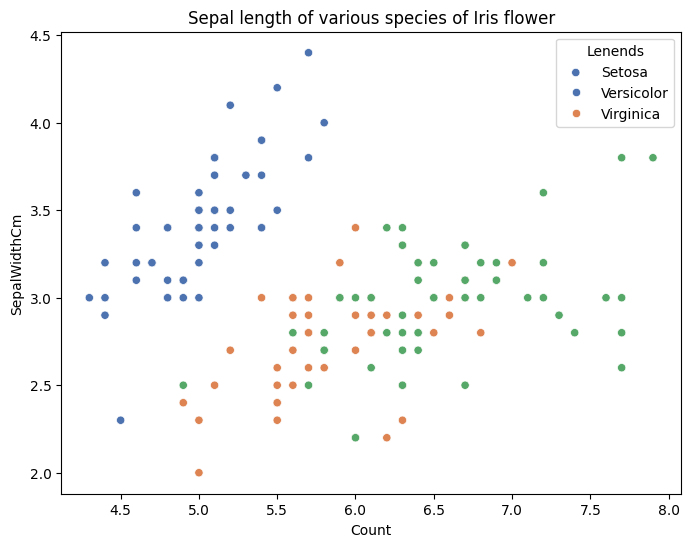

In [36]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='deep', data=data)
plt.xlabel('Count')
plt.title('Sepal length of various species of Iris flower')
plt.legend(title="Lenends", labels=['Setosa','Versicolor','Virginica'])
plt.show()

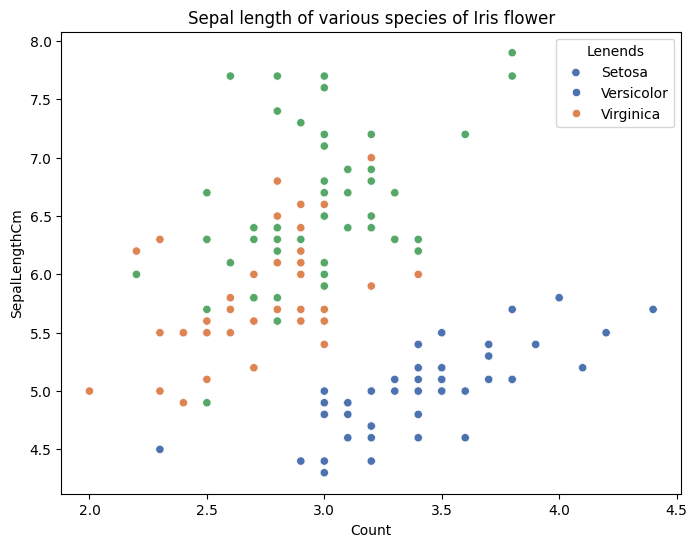

In [37]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='SepalWidthCm', y='SepalLengthCm', hue='Species', palette='deep', data=data)
plt.xlabel('Count')
plt.title('Sepal length of various species of Iris flower')
plt.legend(title="Lenends", labels=['Setosa','Versicolor','Virginica'])
plt.show()

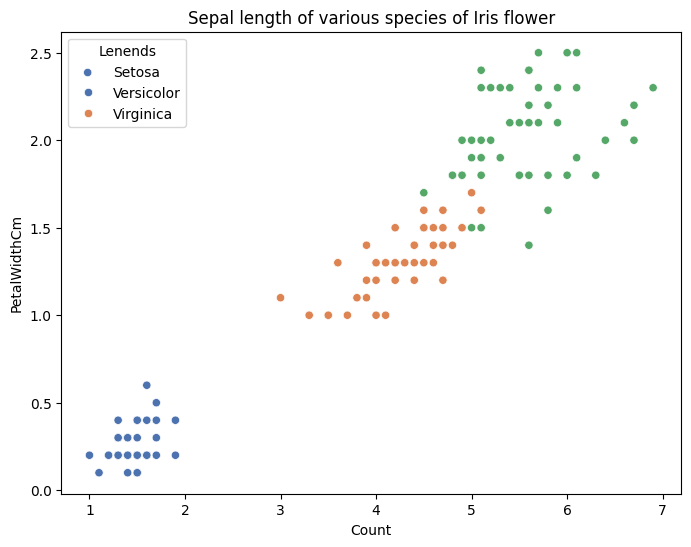

In [39]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='deep', data=data)
plt.xlabel('Count')
plt.title('Sepal length of various species of Iris flower')
plt.legend(title="Lenends", labels=['Setosa','Versicolor','Virginica'])
plt.show()

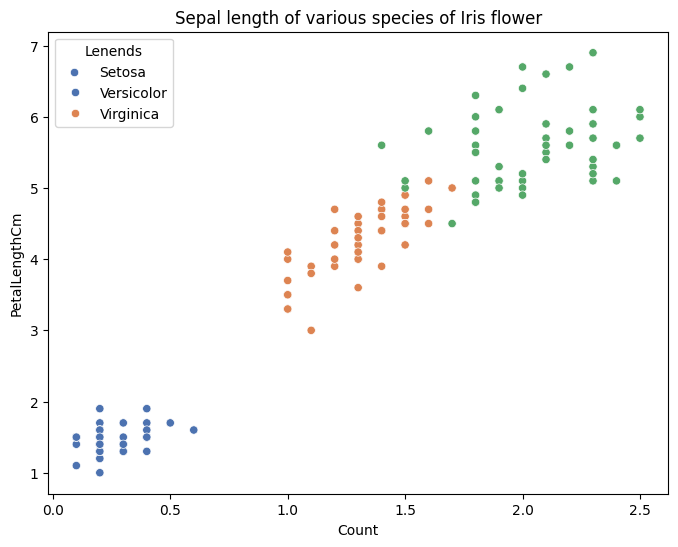

In [38]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='PetalWidthCm', y='PetalLengthCm', hue='Species', palette='deep', data=data)
plt.xlabel('Count')
plt.title('Sepal length of various species of Iris flower')
plt.legend(title="Lenends", labels=['Setosa','Versicolor','Virginica'])
plt.show()